In [111]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import MPLSTYLE
from astropy.wcs import WCS

In [112]:
coordinates = '00:53:11.20 67:30:02.40' #in format: 'hh:mm:ss dd:mm:ss'
lc = lk.search_lightcurve(coordinates, author="SPOC", exptime = 120).download_all()
tpf = lk.search_targetpixelfile(coordinates ,author="SPOC", exptime = 120).download_all()
lc

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 351685700" SECTOR=52 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [113]:
#Select which downloaded file to use

file = 0

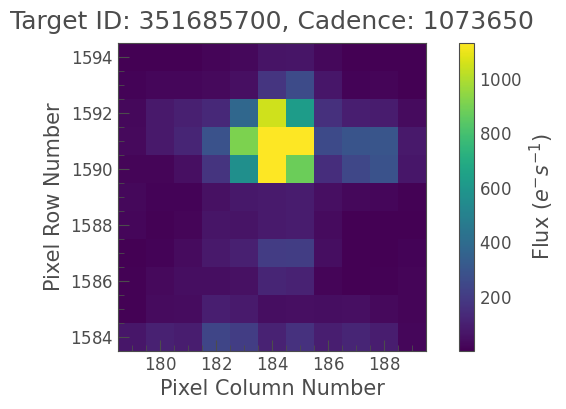

In [117]:
#Plotting 11x11 target pixels image

tpf[file].plot()
#tpf[file].plot(aperture_mask=tpf[file].pipeline_mask) 
#plt.gca().invert_xaxis()
plt.show()

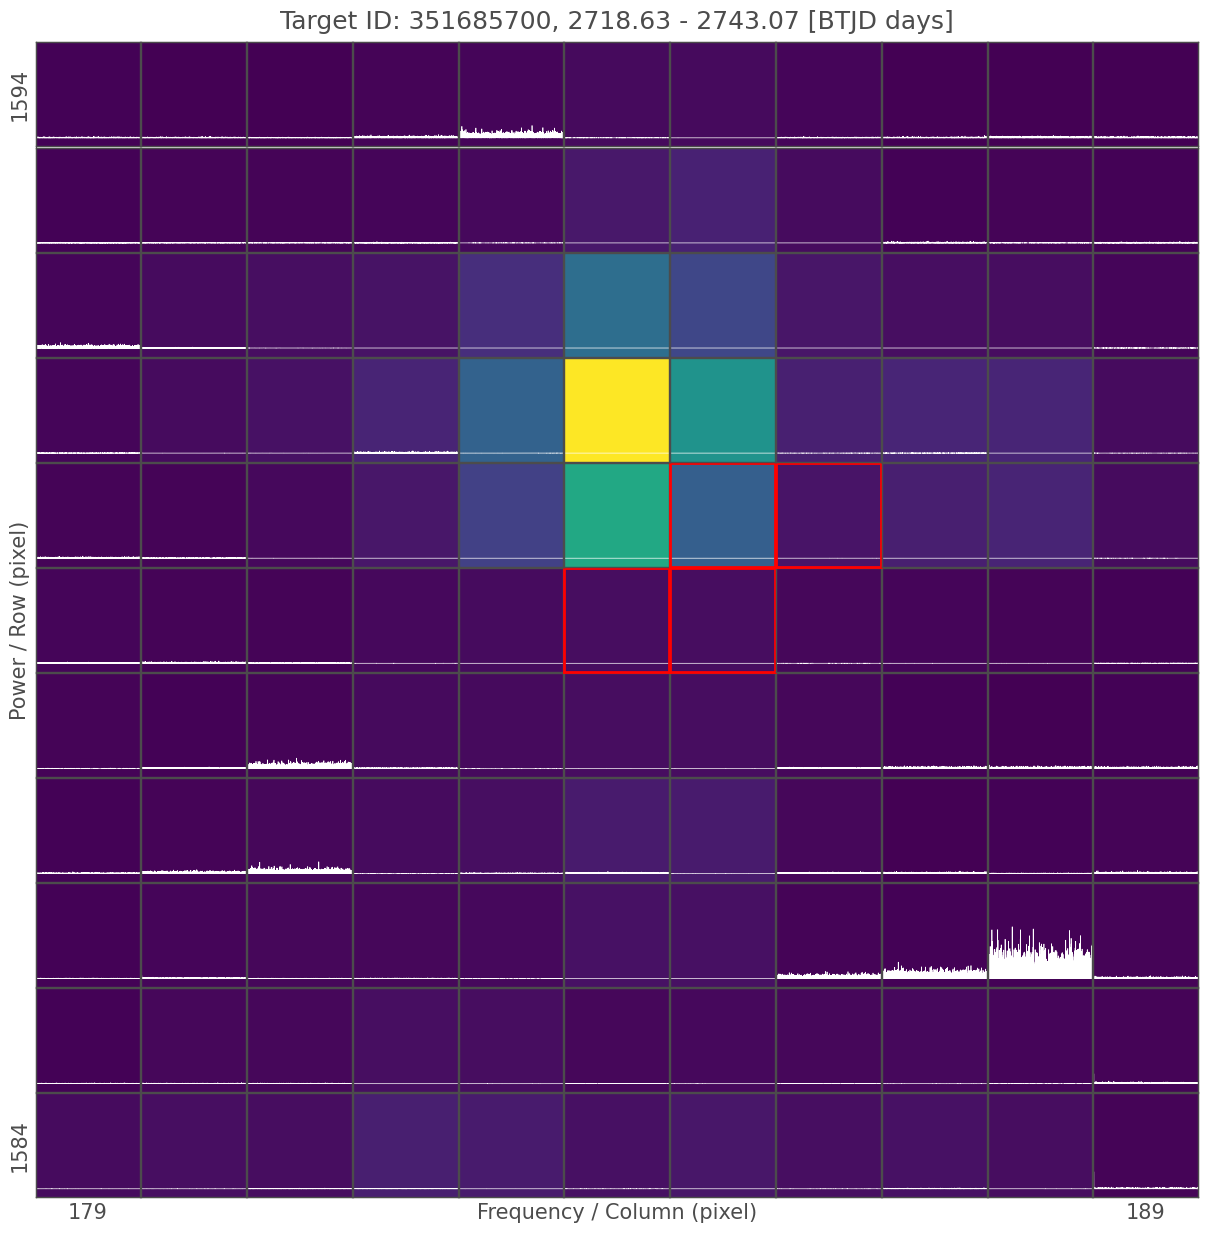

In [115]:
#Plotting LC/PG for every pixel

#tpf[file].plot_pixels(aperture_mask='pipeline')#,show_flux=True, markersize=1.5)
#tpf[file].plot_pixels(corrector_func=lambda x: x.remove_nans().flatten().remove_outliers(), aperture_mask='pipeline')#, show_flux=True)
tpf[file].plot_pixels(periodogram=True, normalization= 'psd', show_flux=True, aperture_mask='pipeline')
plt.show()

In [ ]:
#Plotting light curve

ax = lc[file].remove_nans().remove_outliers(sigma=5).scatter(s=1, label=None)#, column='sap_flux')
ax.set_xlim()
ax.set_title(coordinates)
plt.show()

In [ ]:
#Plotting periodgram 

periodogram = lc[file].to_periodogram(minimum_period = 0.1, maximum_period = 20)
#.remove_nans().remove_outliers(sigma=6).bin(time_bin_size=0.041)
ax = periodogram.plot(view='period', label=None)
#ax.set_xlim(0.1,2)
ax.set_title(coordinates)
plt.show()

In [ ]:
#Plot background light curve

bkg = tpf[file].get_bkg_lightcurve()
bkg.scatter(s=5, label = 'background noise')
plt.show()

In [ ]:
#Plot with PDCSAP flux, binned

ax = lc[file].remove_nans().remove_outliers(sigma=4).bin(time_bin_size=0.041).scatter(s=20, label='PDCSAP flux')
ax.set_ylim()
ax.set_title(coordinates)
plt.show()

In [ ]:
#Plot with SAP flux, binned

ax = lc[file].remove_nans().remove_outliers(sigma=6).bin(time_bin_size=0.041).scatter(s=10, label='SAP flux', column = 'sap_flux')
ax.set_xlim()
ax.set_title(coordinates)
plt.show()

-----Commands to gererate LCs and PGs from all avalible files-----

In [ ]:
#Light curves

for i in range(len(lc)):

    ax = lc[i].remove_nans().remove_outliers(sigma=6).scatter(s=0.5, label=None)

    ax.set_title(coordinates)
    #ax.set_ylabel("Flux (e-/s)")
    #ax.set_xlabel("Time (BJD - 2457000, days)")
    ax.set_xlim()
    ax.set_ylim()

    plt.show()

In [ ]:
#Periodograms

for i in range(len(lc)):

    ax = lc[i].to_periodogram(minimum_period=0.01, maximum_period=30).plot(view='period', label=None)

    ax.set_title(coordinates)
    #ax.set_ylabel("Flux (e-/s)")
    #ax.set_xlabel("Time (BJD - 2457000, days)")
    ax.set_xlim()
    ax.set_ylim()

    plt.show()

-----Commands I found useful-----

In [ ]:
wcs = tpf[0].wcs
wcs

In [ ]:
coords = tpf[0].get_coordinates()
print(coords[0][0][0][0])
print(coords[1][0][0][0])
print(coords[0][0][0][1])
print(coords[1][0][0][1])
print(coords[0][0][0][2])
print(coords[1][0][0][2])
print(coords[0][0][0][3])
print(coords[1][0][0][3])
print(coords[0][0][0][4])
print(coords[1][0][0][4])
print(coords[0][0][0][5])
print(coords[1][0][0][5])
print(coords[0][0][0][6])
print(coords[1][0][0][6])


In [ ]:
tpf[0].wcs.pixel_to_world(5.95229192679804, 5.954434472307184)

In [ ]:
tpf.get_header()